In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/olympics_survey.csv")
df

,Athlete,Age,Country,Year,Closing Ceremony Date,Sport,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,8/12/2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10/1/2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10/1/2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10/1/2000,Archery,0,0,1,1


In [ ]:
df.columns

Index(['Athlete', 'Age', 'Country', 'Year', 'Closing Ceremony Date', 'Sport',
       'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Athlete                8613 non-null   object 
 1   Age                    8613 non-null   float64
 2   Country                8618 non-null   object 
 3   Year                   8618 non-null   int64  
 4   Closing Ceremony Date  8618 non-null   object 
 5   Sport                  8618 non-null   object 
 6   Gold Medals            8618 non-null   int64  
 7   Silver Medals          8618 non-null   int64  
 8   Bronze Medals          8618 non-null   int64  
 9   Total Medals           8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [ ]:
df.shape

(8618, 10)

In [ ]:
df.isnull().sum()

Athlete                  5
Age                      5
Country                  0
Year                     0
Closing Ceremony Date    0
Sport                    0
Gold Medals              0
Silver Medals            0
Bronze Medals            0
Total Medals             0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.skew()

<ipython-input-8-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age              0.859007
Year            -0.001129
Gold Medals      1.638839
Silver Medals    0.955039
Bronze Medals    0.762090
Total Medals     5.580939
dtype: float64

<ipython-input-9-f97c8fb85fb7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Medals'])


<Axes: xlabel='Total Medals', ylabel='Density'>

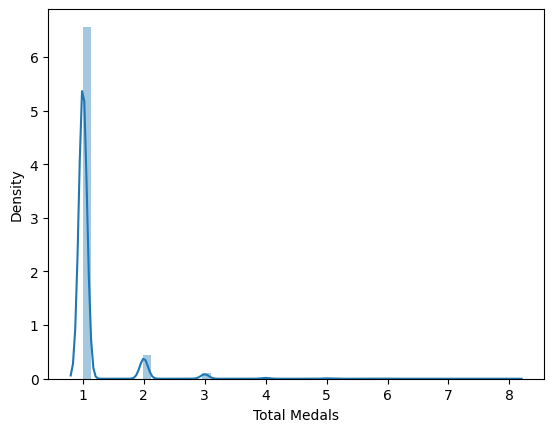

In [ ]:
sns.distplot(df['Total Medals'])

In [ ]:
 #Group the data by country and calculate the total number of medals
medal_counts = df.groupby('Country')['Total Medals'].count().reset_index()

# Sort the data in descending order based on medal count
sorted_medal_counts = medal_counts.sort_values('Total Medals', ascending=False)

# Get the country with the most medals
most_medals_country = sorted_medal_counts.iloc[0]['Country']
most_medals_count = sorted_medal_counts.iloc[0]['Total Medals']

print(f"The country with the most medals is {most_medals_country} with a total of {most_medals_count} medals.")

The country with the most medals is United States with a total of 1109 medals.


In [ ]:
df.groupby(by='Country')['Total Medals'].count().sort_values(ascending=False).reset_index().head(1)


,Country,Total Medals
0,United States,1109


In [ ]:
df.groupby('Country')['Gold Medals'].sum().sort_values(ascending=False).reset_index().head(1)


,Country,Gold Medals
0,United States,552


In [ ]:
df.groupby(['Sport','Country'])['Total Medals'].count().sort_values(ascending=False).reset_index().head(1)


,Sport,Country,Total Medals
0,Swimming,United States,145


In [ ]:
df.groupby(['Sport','Athlete'])['Total Medals'].count().sort_values(ascending=False).reset_index().head(1)


,Sport,Athlete,Total Medals
0,Basketball,Kristi Harrower,4


In [ ]:
df.groupby('Age')['Total Medals'].count().sort_values(ascending=False).reset_index().head(1)


,Age,Total Medals
0,24.0,717


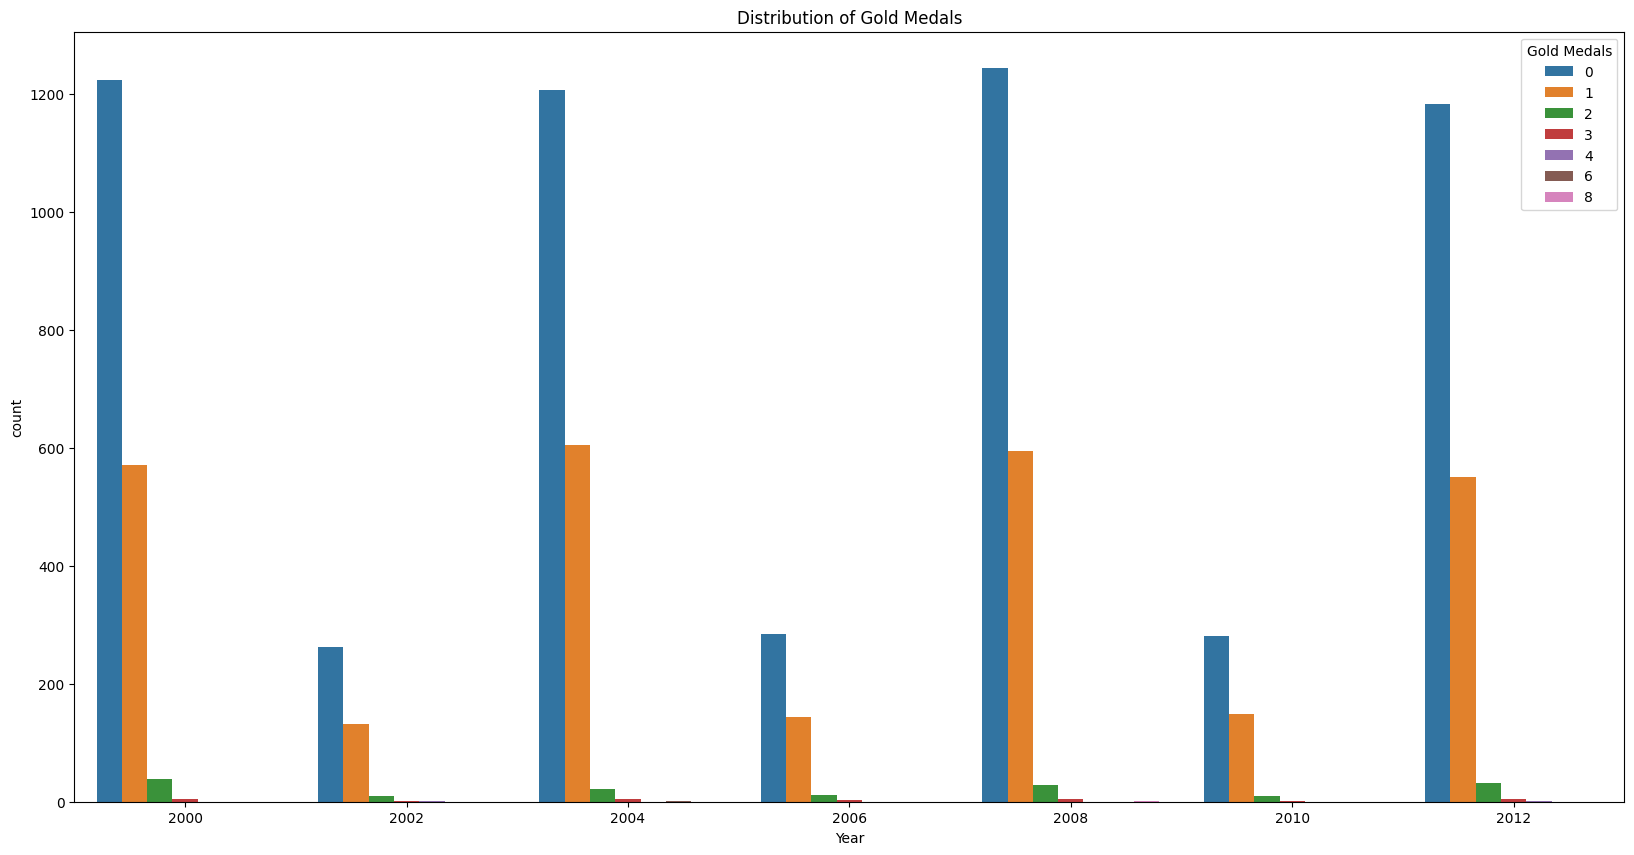

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(x=df["Year"],hue=df['Gold Medals'])
plt.show()

In [ ]:
df.groupby('Country')['Silver Medals'].sum().sort_values(ascending=False).reset_index().head(1)

,Country,Silver Medals
0,United States,440
